Hello Kagglers, in this Notebook I will try to sync with the workflow of a typical ML competition.

and besides this is my first notebook, hope to gain experience in writing this..

> If this notebook is useful to you, please DO UPVOTE 🗳

<h2>Competition Goal</h2>

With  the provided thousands of sixty-second sequences of sensor data recorded from several hundred participants who could have been in either of two possible activity states. 

determine what state a participant was in from the sensor data.

<h1>Importing Libraries</h1>

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

<h2>Loading Data</h2>

In [6]:
DIR_DATASET = "C:/Users/0stxx/Datasets/"
NAME_PROJECT = '2204-kaggle-tps2204'

In [7]:
df_train = pd.read_csv(DIR_DATASET + NAME_PROJECT + '/train.csv')
df_train_labels = pd.read_csv(DIR_DATASET + NAME_PROJECT + '/train_labels.csv')
df_test = pd.read_csv(DIR_DATASET + NAME_PROJECT + '/test.csv')
df_sub = pd.read_csv(DIR_DATASET + NAME_PROJECT + '/sample_submission.csv')

In [8]:
train = df_train
test = df_test
submission = df_sub
labels = df_train_labels

Data Description from kaggle 

train.csv 

*  sequence - a unique id for each sequence

* subject - a unique id for the subject in the experiment

* step - time step of the recording, in one second intervals

* sensor_00 - sensor_12 - the value for each of the thirteen sensors at that time step

* state - the value for each of the thirteen sensors at that time step ##


train_labels.csv - the class label for each sequence.

* sequence - the unique id for each sequence.

* state - the state associated to each sequence. This is the target which you are trying to predict.


test.csv - the test set. For each of the ~12,000 sequences, you should predict a value for that sequence's state.

In [9]:
# give you an quike insght into the train data 
# including count,mean,std,min,25%,50%,75% and max value
train.describe()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06
mean,1.298350e+04,3.316331e+02,2.950000e+01,4.365526e-04,-1.034982e-03,-2.178045e-01,-2.156555e-03,-1.828903e-03,-1.651785e-03,-4.122917e-04,-2.620665e-05,-1.298393e-04,1.365584e-03,3.315801e-04,-3.733291e-03,-1.172605e-02
std,7.496318e+03,1.958257e+02,1.731811e+01,2.658684e+00,4.404200e+00,2.298002e+00,3.934184e+00,1.683685e+00,1.590818e+00,3.345143e+00,3.243428e+00,4.501534e+00,2.592913e+00,1.917333e+00,4.532568e+00,3.911767e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.750634e+02,-4.345977e+02,-3.165948e+01,-4.083761e+02,-2.362601e+01,-7.498280e+01,-4.705046e+02,-4.070115e+02,-5.361000e+02,-2.703468e+02,-4.341271e+01,-4.270586e+02,-6.125494e+02
25%,6.491750e+03,1.617500e+02,1.475000e+01,-5.000000e-01,-4.831933e-01,-6.461531e-01,-4.929204e-01,-4.729928e-01,-4.786836e-01,-4.927140e-01,-5.022901e-01,-5.000000e-01,-5.151734e-01,-4.787939e-01,-4.835391e-01,-5.805627e-01
50%,1.298350e+04,3.350000e+02,2.950000e+01,-3.091190e-03,3.151261e-03,0.000000e+00,0.000000e+00,-1.589577e-03,2.991773e-03,9.107468e-04,-2.290076e-03,0.000000e+00,-1.445087e-03,-1.655822e-03,3.086420e-03,0.000000e+00
75%,1.947525e+04,5.010000e+02,4.425000e+01,4.845440e-01,4.926471e-01,3.338469e-01,4.893805e-01,4.701565e-01,5.056096e-01,4.927140e-01,4.847328e-01,5.000000e-01,5.086705e-01,4.780386e-01,4.938272e-01,5.703325e-01
max,2.596700e+04,6.710000e+02,5.900000e+01,3.358246e+02,4.495914e+02,1.666667e+00,4.366504e+02,2.487286e+01,7.791548e+01,4.425009e+02,3.312542e+02,6.301000e+02,3.679812e+02,4.186559e+01,4.480206e+02,6.305111e+02


In [10]:
# run the code below to check if missing data exits
train.isnull().sum(axis=0)

sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64

<h3>adding labels to train data</h3>

In [11]:
labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [12]:
train =train.merge(labels,how='left', on=["sequence"])
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


<h2>Heatmap && Correlation</h2>

easy to fing that there is no missing data. 

in the next block we will use the **heatmap** hoping to find the 

relationship between sensors through calcaluting **correlation**

**here we use the whole train data to find the correlation**

you can change the train.corr() to ,like,**train[60:120].corr()** to find the second sequence's correlation



> If this notebook is useful to you, please DO UPVOTE 🗳


Text(0.5, 1.0, 'Correlation Heatmap for Train dataset')

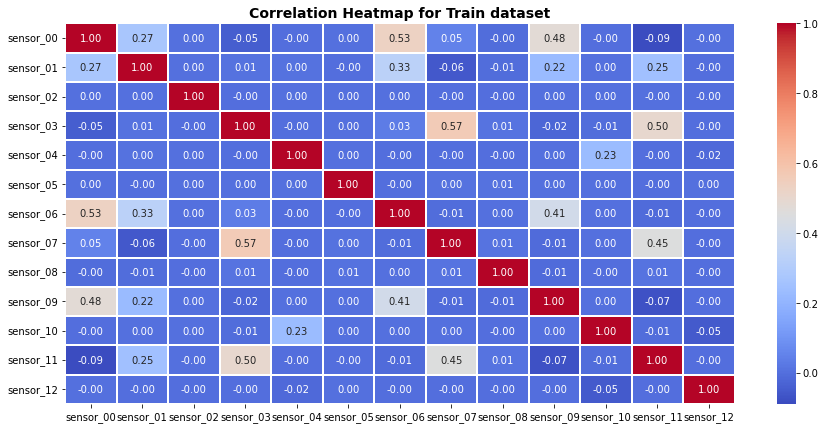

In [13]:
# set the size of the map
features  = [col for col in test.columns if col not in ("sequence","step","subject")]
plt.figure(figsize = (15,7))

hm = sns.heatmap(train[features].corr(),    # data
                cmap = 'coolwarm',# style
                annot = True,     # True to show the specific values
                fmt = '.2f',      # set the precision
                linewidths = 0.05)
plt.title('Correlation Heatmap for Train dataset', 
              fontsize=14, 
              fontweight='bold')

through the heatmap we may have find that
sensor **00, 01, 03, 06, 07, 09, 11** have something to dig

also the sensor 04 and 10 but we just ignore it temporarily

so we will focus on them.

Text(0.5, 1.0, 'Correlation Heatmap for Selected columns from Train dataset')

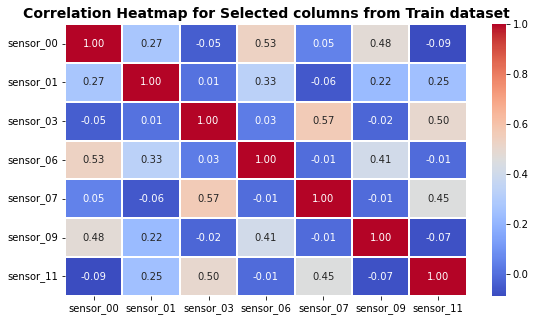

In [14]:
col_t=["sensor_00","sensor_01","sensor_03","sensor_06","sensor_07","sensor_09","sensor_11"]

# set the size of the map
plt.figure(figsize = (9,5))

hm = sns.heatmap(train[col_t].corr(),    # data
                cmap = 'coolwarm',      
                annot = True,     
                fmt = '.2f', 
                linewidths = 0.05)
plt.title('Correlation Heatmap for Selected columns from Train dataset', 
              fontsize=14, 
              fontweight='bold')

Let's have a quike glimpse into the data of the sensors.

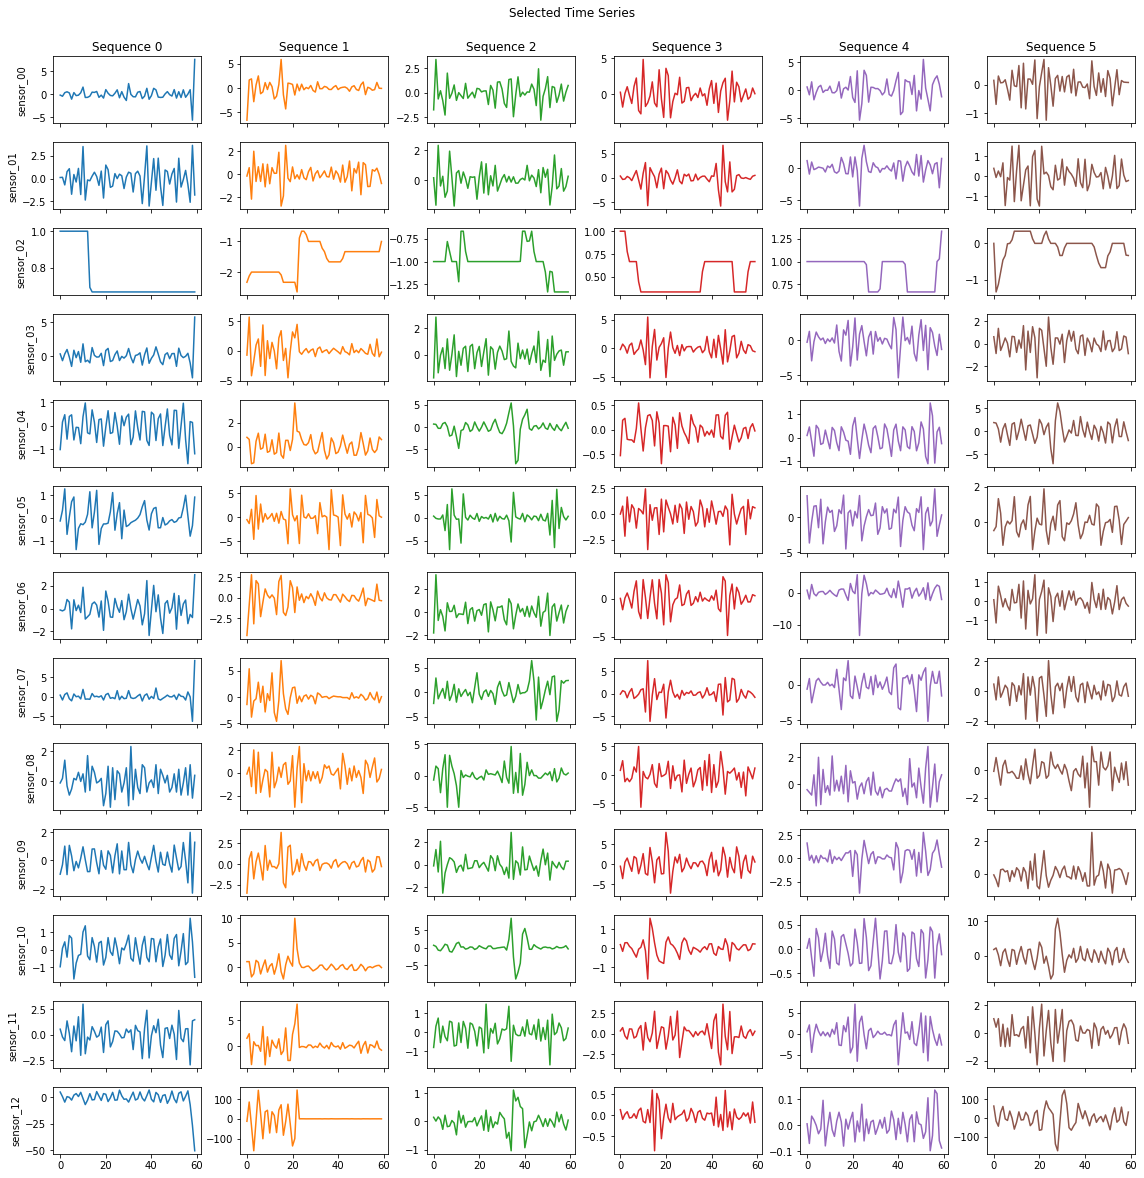

In [15]:
sequences = [0, 1, 2, 3, 4, 5]
figure, axes = plt.subplots(13, len(sequences), sharex=True, figsize=(16, 16))
for i, sequence in enumerate(sequences):
    for sensor in range(13):
        sensor_name = f"sensor_{sensor:02d}"
        plt.subplot(13, len(sequences), sensor * len(sequences) + i + 1)
        plt.plot(range(60), train[train.sequence == sequence][sensor_name],
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10])
        if sensor == 0: plt.title(f"Sequence {sequence}")
        if sequence == sequences[0]: plt.ylabel(sensor_name)
figure.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()

<h1>Feature Seeking bewteen Target and Sensors Data</h1>

here we first introduce the concept of Mutual Information(MI).

Mutual information describes relationships in terms of uncertainty. The MI between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. 

In [16]:
# from sklearn.feature_selection import mutual_info_regression

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

In [17]:
# X_mi = train.copy()
# y_mi = X_mi.pop("state")

# # Label encoding for categoricals
# for colname in X_mi.select_dtypes("object"):
#     X_mi[colname], _ = X_mi[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = X_mi.dtypes == int

The least possible mutual information between quantities is 0.0. When MI is zero, the quantities are independent: neither can tell you anything about the other. Conversely, in theory there's no upper bound to what MI can be. In practice though values above 2.0 or so are uncommon. (Mutual information is a **logarithmic quantity**, so it increases very slowly.)


In [18]:
# %%time
# mi_scores = make_mi_scores(X_mi, y_mi, discrete_features)
# mi_scores[::3]  # show a few features with their MI scores

In [19]:
# mi_scores


below I will test the 'mean', 'max', 'min', 'var', 'mad', 'sum', 'median' value of the data hoping to dig anything valuable

> the codes below are inspired by C4rl05/V with her work [https://www.kaggle.com/code/cv13j0/tps-apr-2022-xgboost-model](http://)

In [20]:
def aggregated_features(df, aggregation_cols = ['sequence'], prefix = ''):
    agg_strategy = {'sensor_00': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_01': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_02': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_03': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_04': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_05': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_06': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_07': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_08': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_09': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_10': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_11': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_12': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                   }
    group = df.groupby(aggregation_cols).aggregate(agg_strategy)
    group.columns = ['_'.join(col).strip() for col in group.columns]
    group.columns = [str(prefix) + str(col) for col in group.columns]
    group.reset_index(inplace = True)
    
    temp = (df.groupby(aggregation_cols).size().reset_index(name = str(prefix) + 'size'))
    group = pd.merge(temp, group, how = 'left', on = aggregation_cols,)
    return group

In [21]:
train_merge_data = aggregated_features(train, aggregation_cols = ['sequence', 'subject'])
test_merge_data = aggregated_features(test, aggregation_cols = ['sequence', 'subject'])

In [22]:
train_subjects_merge_data = aggregated_features(train, aggregation_cols = ['subject'], prefix = 'subject_')
test_subjects_merge_data = aggregated_features(test, aggregation_cols = ['subject'], prefix = 'subject_')

up to now we have a clear view of the values of sensors 

In [23]:
train_subjects_merge_data.head()

,subject,subject_size,subject_sensor_00_mean,subject_sensor_00_max,subject_sensor_00_min,subject_sensor_00_var,subject_sensor_00_mad,subject_sensor_00_sum,subject_sensor_00_median,subject_sensor_01_mean,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,1200,0.001058,3.936631,-4.695518,0.579405,0.524290,1.269706,0.003864,-0.000478,...,0.445067,-3.368313,-0.011831,-0.007687,1.536232,-7.801790,0.371089,0.459001,-9.224211,0.007886
1,1,10500,-0.002550,35.463679,-34.591963,1.546208,0.745773,-26.778980,0.002318,-0.014114,...,0.731817,42.049383,-0.014403,-0.107664,328.472293,-293.231458,4107.284790,50.113950,-1130.476130,0.505754
2,2,2280,0.010308,6.453632,-6.898764,1.465470,0.813444,23.503091,-0.023570,-0.008271,...,0.539252,-19.794239,0.001543,-0.590029,416.050298,-425.902387,23282.308252,126.422564,-1345.265985,-3.700128
3,3,2160,-0.004428,5.753478,-8.153787,0.846161,0.601889,-9.564915,-0.002318,-0.000313,...,0.489554,-2.666667,0.017490,0.000702,1.424552,-1.623615,0.006993,0.044377,1.516624,0.000426
4,4,1560,0.008160,5.770479,-4.090417,0.565596,0.531483,12.729521,-0.008501,0.003920,...,0.614274,5.048354,0.036523,-0.002236,1.789003,-2.025149,0.131529,0.234263,-3.488917,-0.023018


<h3>Experimenting with Lags</h3>

>lagging is a commom techinic used in time series datasets

Lagging a time series means to shift its values forward one or more time steps, or equivalently, to shift the times in its index backward one or more steps. In either case, the effect is that the observations in the lagged series will appear to have happened later in time.

In [24]:
train['sensor_00_lag_01'] = train['sensor_00'].shift(1)
train['sensor_00_lag_10'] = train['sensor_00'].shift(10)
train.head(15)

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state,sensor_00_lag_01,sensor_00_lag_10
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0,NaN,NaN
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0,-0.196291,NaN
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0,-0.447450,NaN
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0,0.326893,NaN
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0,0.523184,NaN
5,0,47,5,-1.073416,-1.714286,1.000000,-1.492920,0.469736,0.713538,-1.792350,-1.082443,-0.5,0.314306,0.664594,-1.682099,-2.838448,0,0.272025,NaN
6,0,47,6,0.350850,0.439076,1.000000,0.870796,-0.596964,0.923710,0.769581,0.666412,0.2,-0.723266,-1.691552,0.842593,1.849531,0,-1.073416,NaN
7,0,47,7,-0.304482,-0.379202,1.000000,-0.218584,-0.059983,-1.389678,-0.182149,-0.029771,0.1,-0.070809,-0.774024,-0.612140,3.300938,0,0.350850,NaN
8,0,47,8,-0.216383,1.106092,1.000000,0.677876,-0.071718,-0.456993,0.296903,0.111450,0.6,-0.525289,-0.334069,1.751029,0.515772,0,-0.304482,NaN
9,0,47,9,0.303709,-1.744748,1.000000,-0.896460,-0.755221,-0.254301,-0.354281,-0.591603,0.0,0.151012,-0.268359,-2.033951,4.509378,0,-0.216383,NaN


<h3>Merging the Datasets before Training</h3>

In [25]:
train_merge_data = train_merge_data.merge(labels, how = 'left', on = 'sequence')

In [26]:
train_merge_data = train_merge_data.merge(train_subjects_merge_data, how = 'left', on = 'subject')
test_merge_data = test_merge_data.merge(test_subjects_merge_data, how = 'left', on = 'subject')
train_merge_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,47,60,0.041744,7.534003,-5.634467,2.049649,0.829612,2.504637,-0.148764,...,1.382194,-206.570988,0.022634,-0.078774,213.832481,-312.621910,411.832698,12.579934,-491.551151,-0.254476
1,1,66,60,-0.069294,5.870943,-6.657651,2.540538,0.964271,-4.157651,-0.031298,...,1.292805,42.286008,0.034465,-0.707871,268.698210,-317.453112,2151.151810,21.210487,-1189.222933,-0.006181
2,2,66,60,-0.001546,3.402628,-2.797527,1.316816,0.855307,-0.092736,0.058733,...,1.292805,42.286008,0.034465,-0.707871,268.698210,-317.453112,2151.151810,21.210487,-1189.222933,-0.006181
3,3,542,60,0.029869,4.856260,-3.643740,3.131857,1.379164,1.792117,-0.119784,...,1.031835,16.807613,0.023663,0.001263,3.487639,-3.136829,0.284165,0.349181,6.289855,-0.012788
4,4,437,60,0.059132,5.455951,-5.331530,4.059335,1.495183,3.547913,0.005410,...,2.638035,329.658436,0.006173,0.000280,2.629156,-2.805200,0.101305,0.216635,3.347826,0.003410


In [27]:
test_merge_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,25968,684,60,-0.002602,3.146832,-4.950541,1.191898,0.732741,-0.156105,-0.002318,...,0.850266,-15.966049,0.012346,-0.001973,2.274936,-3.095055,0.128112,0.257374,-8.288150,-0.001705
1,25969,935,60,0.028516,5.816074,-3.675425,2.102617,0.848916,1.710974,-0.015842,...,0.769165,-12.937243,0.005144,-0.002083,2.197357,-2.149616,0.444153,0.540439,-7.374680,-0.044970
2,25970,924,60,0.057664,12.306028,-15.005410,25.843168,4.023308,3.459815,1.079212,...,3.311826,-101.524691,-0.010802,-0.308142,253.685422,-182.180307,2106.566889,34.328376,-702.563512,-1.936275
3,25971,769,60,-0.004791,2.876352,-2.465997,0.837073,0.687991,-0.287481,-0.033617,...,0.516179,10.443416,-0.002058,-0.001365,19.086957,-17.872975,1.103406,0.666881,-5.732310,-0.070546
4,25972,764,60,-0.001443,17.295209,-9.974498,7.748900,1.083572,-0.086553,-0.171947,...,1.233048,-144.852881,-0.005144,-0.002999,436.830350,-518.899403,17067.111823,106.631204,-8.815857,12.570546


<h3>Post Processing the Information for the Model</h3>

In [28]:
ignore = ['sequence', 'state', 'subject']
features = [feat for feat in train_merge_data.columns if feat not in ignore]
target_feature = 'state'

<h3>Train - Test Split </h3>

you may do cross-validation too.

In [29]:
%%time
from sklearn.model_selection import train_test_split
test_size_pct = 0.3
X_train, X_valid, y_train, y_valid = train_test_split(
                                train_merge_data[features], 
                                train_merge_data[target_feature], 
                                test_size = test_size_pct, 
                                random_state = 2022)

CPU times: total: 141 ms
Wall time: 206 ms


<h3>Building a XGBoost Model</h3>

In [30]:
from xgboost  import XGBClassifier

params = {'n_estimators': 8192,
          'max_depth': 7,
          'learning_rate': 0.1,
          'subsample': 0.96,
          'colsample_bytree': 0.80,
          'reg_lambda': 1.50,
          'reg_alpha': 6.10,
          'gamma': 1.40,
          'random_state': 16,
          'objective': 'binary:logistic',
          #'tree_method': 'gpu_hist',
         }

xgb = XGBClassifier(**params)
xgb.fit(X_train, y_train, 
        eval_set = [(X_valid, y_valid)], 
        eval_metric = ['auc','logloss'], 
        early_stopping_rounds = 64, 
        verbose = 32)

[0]	validation_0-auc:0.79686	validation_0-logloss:0.66429
[32]	validation_0-auc:0.89343	validation_0-logloss:0.41506
[64]	validation_0-auc:0.91245	validation_0-logloss:0.37168
[96]	validation_0-auc:0.92274	validation_0-logloss:0.34761
[128]	validation_0-auc:0.92773	validation_0-logloss:0.33495
[160]	validation_0-auc:0.92981	validation_0-logloss:0.32924
[192]	validation_0-auc:0.93204	validation_0-logloss:0.32342
[224]	validation_0-auc:0.93296	validation_0-logloss:0.32078
[256]	validation_0-auc:0.93367	validation_0-logloss:0.31899
[288]	validation_0-auc:0.93444	validation_0-logloss:0.31708
[320]	validation_0-auc:0.93460	validation_0-logloss:0.31667
[352]	validation_0-auc:0.93478	validation_0-logloss:0.31626
[384]	validation_0-auc:0.93510	validation_0-logloss:0.31568
[416]	validation_0-auc:0.93515	validation_0-logloss:0.31568
[448]	validation_0-auc:0.93540	validation_0-logloss:0.31531
[480]	validation_0-auc:0.93545	validation_0-logloss:0.31514
[512]	validation_0-auc:0.93543	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8192, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=16, reg_alpha=6.1, reg_lambda=1.5,
              scale_pos_weight=1, subsample=0.96, tree_method='exact',
              validate_parameters=1, verbosity=None)

<h3>Building a LGBM Model</h3>

In [31]:
from lightgbm import LGBMClassifier
params = {'n_estimators': 8192,
          'max_depth': 7,
          'learning_rate': 0.1,
          'subsample': 0.96,
          'colsample_bytree': 0.80,
          'reg_lambda': 1.50,
          'reg_alpha': 6.10,
          'gamma': 1.40,
          'random_state': 16
         }

lgb=LGBMClassifier(**params)
lgb.fit(X_train, y_train, 
        eval_set = [(X_valid, y_valid)], 
        eval_metric = ['auc','logloss'], 
        early_stopping_rounds = 64, 
        verbose = 32)

[LightGBM] [Warning] Unknown parameter: gamma
Training until validation scores don't improve for 64 rounds
[32]	valid_0's auc: 0.888272	valid_0's binary_logloss: 0.426351
[64]	valid_0's auc: 0.909602	valid_0's binary_logloss: 0.379009
[96]	valid_0's auc: 0.920462	valid_0's binary_logloss: 0.353505
[128]	valid_0's auc: 0.926438	valid_0's binary_logloss: 0.338673
[160]	valid_0's auc: 0.92961	valid_0's binary_logloss: 0.329945
[192]	valid_0's auc: 0.93226	valid_0's binary_logloss: 0.323218
[224]	valid_0's auc: 0.933578	valid_0's binary_logloss: 0.319394
[256]	valid_0's auc: 0.934767	valid_0's binary_logloss: 0.316061
[288]	valid_0's auc: 0.935572	valid_0's binary_logloss: 0.313715
[320]	valid_0's auc: 0.936405	valid_0's binary_logloss: 0.311499
[352]	valid_0's auc: 0.936789	valid_0's binary_logloss: 0.310403
[384]	valid_0's auc: 0.936883	valid_0's binary_logloss: 0.310099
[416]	valid_0's auc: 0.937112	valid_0's binary_logloss: 0.30963
[448]	valid_0's auc: 0.937254	valid_0's binary_logloss

LGBMClassifier(colsample_bytree=0.8, gamma=1.4, max_depth=7, n_estimators=8192,
               random_state=16, reg_alpha=6.1, reg_lambda=1.5, subsample=0.96)

<h3>Check the Feature Importance through plots</h3>

In [32]:
def plot_feature_importance(importance, names, model_type, max_features = 10):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.head(max_features)

    #Define size of bar plot
    plt.figure(figsize=(8,6))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

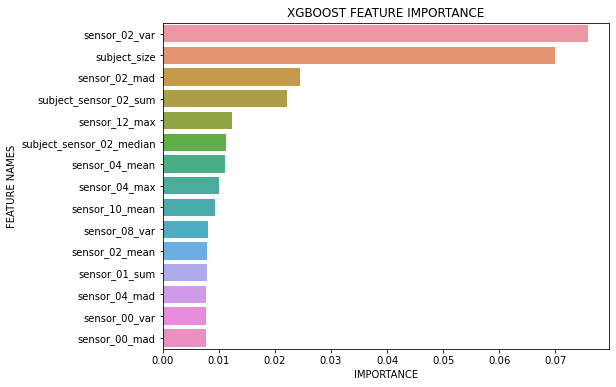

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_feature_importance(xgb.feature_importances_,X_train.columns,'XGBOOST ', max_features = 15)

<h3>Make Submission File</h3>

In [34]:
from sklearn.metrics import roc_auc_score
xgb_preds = xgb.predict_proba(test_merge_data[features])[:, 1]
xgb_preds

array([0.92164207, 0.9902754 , 0.01538261, ..., 0.67766815, 0.02627309,
       0.03975347], dtype=float32)

In [35]:
lgb_preds=lgb.predict_proba(test_merge_data[features])[:, 1]
lgb_preds

array([0.95154053, 0.98680751, 0.0183721 , ..., 0.70441866, 0.01209891,
       0.04195193])

In [49]:
df_sub['state'] = (xgb_preds + lgb_preds) / 2
# df_sub['state'] = df_sub['state'].apply(int)

In [50]:
df_sub.head()

,sequence,state
0,25968,0.936591
1,25969,0.988541
2,25970,0.016877
3,25971,0.830818
4,25972,0.704713


In [51]:
import datetime
now = datetime.datetime.now()
str_datetime = now.strftime("%y%m%d_%H%M%S")
df_sub.to_csv(DIR_DATASET +'submission-'+ NAME_PROJECT +'-'+str_datetime+'.csv', index = 0)

ENsemble from DNN model
later will be updated..

rough version.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold, GroupKFold

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Concatenate, LSTM, GRU
from tensorflow.keras.layers import Bidirectional, Multiply
np.random.seed(22)
tf.random.set_seed(22)

train = pd.read_csv('../input/tabular-playground-series-apr-2022/train.csv')
t_lbls = pd.read_csv('../input/tabular-playground-series-apr-2022/train_labels.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2022/test.csv')
s6 = pd.read_csv('../input/tabular-playground-series-apr-2022/sample_submission.csv')
s7=pd.read_csv('../input/sub7-dnn/submission7.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/tabular-playground-series-apr-2022/train.csv'

In [ ]:
features = train.columns.tolist()[3:]
def prep(df):
    for feature in features:
        df[feature + '_lag1'] = df.groupby('sequence')[feature].shift(1)
        df.fillna(0, inplace=True)
        df[feature + '_diff1'] = df[feature] - df[feature + '_lag1']    

prep(train)
prep(test)

features = train.columns.tolist()[3:]
sc = StandardScaler()
train[features] = sc.fit_transform(train[features])
test[features] = sc.transform(test[features])

groups = train["sequence"]
labels = t_lbls["state"]

train = train.drop(["sequence", "subject", "step"], axis=1).values
train = train.reshape(-1, 60, train.shape[-1])

test = test.drop(["sequence", "subject", "step"], axis=1).values
test = test.reshape(-1, 60, test.shape[-1])

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = tpu_strategy.num_replicas_in_sync * 64
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")
    
except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 256
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

<h2>DNN model1

In [ ]:
def dnn_model():
    
    x_input = Input(shape=(train.shape[-2:]))
    
    x0 = Bidirectional(LSTM(units=256, return_sequences=True))(x_input)
    x1 = Bidirectional(LSTM(units=512, return_sequences=True))(x0)
    x2 = Bidirectional(LSTM(units=256, return_sequences=True))(x1)
    z1 = Bidirectional(GRU(units=256, return_sequences=True))(x1)
    
    c = Concatenate(axis=2)([x2, z1])
    
    x3 = Bidirectional(LSTM(units=256, return_sequences=True))(c)
    
    x4 = GlobalMaxPooling1D()(x3)
    x5 = Dense(units=128, activation='selu')(x4)
    x_output = Dense(1, activation='sigmoid')(x5)

    model = Model(inputs=x_input, outputs=x_output, name='lstm_model')
    
    return model

model = dnn_model()

<h2>DNN model2

In [ ]:
def dnn_model2():
    
    x_input = Input(shape=(train.shape[-2:]))
    xi = Bidirectional(LSTM(units=128, return_sequences=True))(x_input)
    x0 = Bidirectional(LSTM(units=256, return_sequences=True))(xi)
    x00 = Bidirectional(LSTM(units=512, return_sequences=True))(x0)
    x1 = Bidirectional(LSTM(units=256, return_sequences=True))(x00)
    
    x2 = Bidirectional(LSTM(units=256, return_sequences=True))(x1)
    z1 = Bidirectional(GRU(units=256, return_sequences=True))(x1)
    
    c = Concatenate(axis=2)([x2, z1])
    
    x3 = Bidirectional(LSTM(units=256, return_sequences=True))(c)
    
    x4 = GlobalMaxPooling1D()(x3)
    x5 = Dense(units=128, activation='selu')(x4)
    x6 = Dense(units=64, activation='selu')(x5)
    x_output = Dense(1, activation='sigmoid')(x6)

    model = Model(inputs=x_input, outputs=x_output, name='lstm_model2')
    
    return model

model2 = dnn_model2()

In [ ]:
with tpu_strategy.scope():
    VERBOSE = 64
#     BATCH_SIZE = 256
    predictions, scores = [], []
    k = GroupKFold(n_splits = 6)

    for fold, (train_idx, val_idx) in enumerate(k.split(train, labels, groups.unique())):
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)

        X_train, X_val = train[train_idx], train[val_idx]
        y_train, y_val = labels.iloc[train_idx].values, labels.iloc[val_idx].values

        model = dnn_model()
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics='AUC')

        lr = ReduceLROnPlateau(monitor="val_auc", factor=0.6, 
                               patience=5, verbose=VERBOSE)

        es = EarlyStopping(monitor="val_auc", patience=10, 
                           verbose=VERBOSE, mode="max", 
                           restore_best_weights=True)

        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
        chk_point = ModelCheckpoint(f'./TPS_model_1_2022_{fold+1}C.h5', options=save_locally, 
                                    monitor='val_auc', verbose=VERBOSE, 
                                    save_best_only=True, mode='max')

        model.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=25,
                  verbose=VERBOSE,
                  batch_size=BATCH_SIZE, 
                  callbacks=[lr, chk_point, es])

        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = load_model(f'./TPS_model_1_2022_{fold+1}C.h5', options=load_locally)

        y_pred = model.predict(X_val, batch_size=BATCH_SIZE).squeeze()
        score = roc_auc_score(y_val, y_pred)
        scores.append(score)
        predictions.append(model.predict(test, batch_size=BATCH_SIZE).squeeze())
        print(f"model1,Fold-{fold+1} | OOF Score: {score}")

print(f'Mean accuracy on {k.n_splits} folds - {np.mean(scores)}')

In [ ]:
s6["state"] = sum(predictions)/k.n_splits
s6["state"]

In [ ]:
with tpu_strategy.scope():
    VERBOSE = 64
    # BATCH_SIZE = 256
    predictions, scores = [], []
    k = GroupKFold(n_splits = 6)

    for fold, (train_idx, val_idx) in enumerate(k.split(train, labels, groups.unique())):
        print('-'*15, '>', f'Fold {fold+1}', '<', '-'*15)

        X_train, X_val = train[train_idx], train[val_idx]
        y_train, y_val = labels.iloc[train_idx].values, labels.iloc[val_idx].values

        model = dnn_model2()
        model.compile(optimizer="adam", loss="binary_crossentropy", metrics='AUC')

        lr = ReduceLROnPlateau(monitor="val_auc", factor=0.6, 
                               patience=5, verbose=VERBOSE)

        es = EarlyStopping(monitor="val_auc", patience=10, 
                           verbose=VERBOSE, mode="max", 
                           restore_best_weights=True)

        save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
        chk_point = ModelCheckpoint(f'./TPS_model_2_2022{fold+1}C.h5', options=save_locally, 
                                    monitor='val_auc', verbose=VERBOSE, 
                                    save_best_only=True, mode='max')

        model.fit(X_train, y_train, 
                  validation_data=(X_val, y_val), 
                  epochs=25,
                  verbose=VERBOSE,
                  batch_size=BATCH_SIZE, 
                  callbacks=[lr, chk_point, es])

        load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
        model = load_model(f'./TPS_model_2_2022_{fold+1}C.h5', options=load_locally)

        y_pred = model.predict(X_val, batch_size=BATCH_SIZE).squeeze()
        score = roc_auc_score(y_val, y_pred)
        scores.append(score)
        predictions.append(model.predict(test, batch_size=BATCH_SIZE).squeeze())
        print(f"model2,Fold-{fold+1} | OOF Score: {score}")

print(f'Mean accuracy on {k.n_splits} folds - {np.mean(scores)}')

In [ ]:
s7["state"] = sum(predictions)/k.n_splits
s7["state"]

In [ ]:
blendsub=pd.read_csv("../input/sensors-deep-analysis-0-98/blend_sub31_exp.csv")
preds=(s7.state+s6.state)*0.35/2+xgb_preds*0.15+lgb_preds*0.15+blendsub.state*0.35
preds

just replace the state columns with your predicts

In [ ]:

submission['state'] = preds
submission.to_csv('my_submission_ty.csv', index = False)




**still working on find more features ....
will be updated soon!**